In [1]:
import pickle
import PIL
from IPython.display import Image 
import torch, torchvision

In [26]:
poison_setups = 'poison_setups/cifar10_transfer_learning.pickle'
poison_setups = 'poison_setups/cifar10_from_scratch.pickle'
poison_setups = 'poison_setups/tinyimagenet_transfer_learning.pickle'
#poison_setups = 'poison_setups/tinyimagenet_from_scratch.pickle'

In [27]:
with open(poison_setups, "rb") as handle:
    setup_dicts = pickle.load(handle)

In [11]:
setup_dicts

[{'target class': 89,
  'target index': 5903,
  'base class': 50,
  'base indices': array([25300, 25264, 25006, 25400, 25199, 25469, 25392, 25407, 25432,
         25456, 25141, 25424, 25386, 25288, 25193, 25452, 25484, 25317,
         25138, 25003, 25072, 25064, 25434, 25358, 25042, 25217, 25481,
         25179, 25360, 25191, 25060, 25359, 25117, 25252, 25155, 25211,
         25478, 25090, 25269, 25450, 25378, 25308, 25084, 25369, 25026,
         25257, 25292, 25330, 25303, 25059, 25004, 25401, 25294, 25276,
         25393, 25326, 25168, 25074, 25256, 25362, 25251, 25154, 25229,
         25157, 25310, 25142, 25017, 25176, 25499, 25357, 25265, 25238,
         25065, 25038, 25343, 25412, 25037, 25086, 25281, 25247, 25048,
         25287, 25486, 25130, 25312, 25040, 25226, 25080, 25313, 25435,
         25494, 25490, 25321, 25069, 25116, 25057, 25140, 25307, 25000,
         25031, 25151, 25355, 25344, 25441, 25272, 25146, 25165, 25067,
         25459, 25479, 25169, 25430, 25171, 25410, 250

In [ ]:
with open('poison_examples/htbd_poisons/num_poisons=25/0/target.pickle','rb') as handle:
    target = pickle.load(handle)

In [5]:
from matplotlib import pyplot as plt
plt.imshow(target[2].permute(1,2,0))

NameError: name 'target' is not defined

In [ ]:
#[x for x in setup_dicts if x['target class'] == 1 and x['base class'] == 8]


In [6]:
def getTrial(n, attack):
    with open(f'poison_examples/{attack}_poisons/num_poisons=25/{n}/base_indices.pickle','rb') as handle:
        base = pickle.load(handle)
    with open(f'poison_examples/{attack}_poisons/num_poisons=25/{n}/target.pickle','rb') as handle:
        target = pickle.load(handle)
    with open(f'poison_examples/{attack}_poisons/num_poisons=25/{n}/poisons.pickle','rb') as handle:
        poisons= pickle.load(handle)
    return base, target, poisons

In [7]:
clbdbase, clbdtarget, clbdpoisons = getTrial(24, 'clbd')
htbdbase, htbdtarget, htbdpoisons = getTrial(24, 'htbd')
fcbase, fctarget, fcpoisons = getTrial(24, 'fc')
fcbase

array([ 3822, 34206, 30951, 18093, 34700, 18181, 11744, 36935, 46679,
       34906,  2795,  5157, 46332, 28598, 31703, 44854,  7350,  4803,
       35953, 10122, 38542, 14302,  5171, 12516, 16850])

In [8]:
out = []
for i in range(100):
    L1 = getTrial(i, 'htbd')
    L2 = getTrial(i, 'clbd')
    L3 = getTrial(i, 'fc')
    assert all(L1[0] == L2[0])
    out.append(L1[0])
out

[array([33922, 11944, 30575, 17174, 42674,  5649, 24476, 13194, 24587,
        42204,  8515, 43220, 17865,  4567, 24374, 39691, 43775, 28408,
         4079, 48516, 40761, 41842, 35626, 49004, 25820]),
 array([ 4069,  5161, 14564, 43326, 46662, 30675, 26393, 47303, 39099,
         6951, 19323, 20804,  2347, 41544, 45612,    50, 21478, 40339,
        37447, 34205, 25991, 42343, 14467,  9807,  3007]),
 array([26182, 24907, 35013, 43047, 43007, 39738, 29676, 11141, 39590,
        24554, 38978, 17034, 26703,  1245, 16792, 12646,  6948, 16084,
        38867, 10233, 16315, 38458,  1141, 38469, 35447]),
 array([46043, 34447, 18826,   745, 10113,  2997,  6473, 35349, 21937,
         4450, 30944, 21177, 25935, 45794, 16106,  4904, 16639, 40128,
         9681, 18895, 15023,  4035, 38151,  2713, 36060]),
 array([21143, 36393, 12660, 30837, 38963, 11022, 49245, 26312, 27000,
        11912,  3918, 38921, 18273, 27749, 17862, 18906, 46192,  8898,
        26842,  1668, 10124, 27338,  8578, 23035, 1193

In [112]:
for i in range(100):
    for j in range(len(setup_dicts)):
        #print(out[i])
        #print(setup_dicts[j]['base indices'])
        if all(out[i] == setup_dicts[j]['base indices']):
            print('good')
    

In [63]:
setup_dicts[24]

{'target class': 2,
 'target index': 4646,
 'base class': 5,
 'base indices': array([ 5606, 32785, 43340, 38954, 35989, 32889, 22301,    83, 47103,
        10413,  9295, 43399,   697,  9099, 23176, 46069, 25056, 15939,
        15499, 47134, 47964, 31225, 23494, 31376,  7677])}

In [10]:
clbdbase

array([ 3822, 34206, 30951, 18093, 34700, 18181, 11744, 36935, 46679,
       34906,  2795,  5157, 46332, 28598, 31703, 44854,  7350,  4803,
       35953, 10122, 38542, 14302,  5171, 12516, 16850])

In [11]:
clbdtarget

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA12E0D0>,
 8,
 tensor([[[0.0000, 0.0000, 0.0000, 0.6706, 1.0000],
          [0.0000, 0.1294, 0.3961, 0.5529, 0.6039],
          [0.0000, 0.3961, 1.0000, 0.3961, 0.0000],
          [0.6510, 0.5490, 0.3961, 0.5216, 0.6039],
          [1.0000, 0.6196, 0.0000, 0.6196, 1.0000]],
 
         [[0.0000, 0.0000, 0.0000, 0.6706, 1.0000],
          [0.0000, 0.1294, 0.3961, 0.5529, 0.6039],
          [0.0000, 0.3961, 1.0000, 0.3961, 0.0000],
          [0.6510, 0.5490, 0.3961, 0.5216, 0.6039],
          [1.0000, 0.6196, 0.0000, 0.6196, 1.0000]],
 
         [[0.0000, 0.0000, 0.0000, 0.6706, 1.0000],
          [0.0000, 0.1294, 0.3961, 0.5529, 0.6039],
          [0.0000, 0.3961, 1.0000, 0.3961, 0.0000],
          [0.6510, 0.5490, 0.3961, 0.5216, 0.6039],
          [1.0000, 0.6196, 0.0000, 0.6196, 1.0000]]]),
 [27, 27])

In [12]:
clbdpoisons

[(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D633E940>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA145F10>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D63C8A60>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D63C89A0>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA1498E0>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA149340>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D9FD6430>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA432700>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4CA0>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4A00>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4A90>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4B80>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4BB0>, 1),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4610>, 1),
 (<PIL.Image.Image image mode=RGB 

In [78]:
def getGu(n):
    with open(f'./poison_examples/badnets_poisons/{n}/base_indices.pickle','rb') as handle:
        base = pickle.load(handle)
        print(base)
    with open(f'./poison_examples/badnets_poisons/{n}/target.pickle','rb') as handle:
        target = pickle.load(handle)
    with open(f'./poison_examples/badnets_poisons/{n}/poisons.pickle','rb') as handle:
        poisons= pickle.load(handle)
    return base, target, poisons

In [84]:
gubase, gutarget, gupoisons = getGu(97)

[ 4283 22524  5687 46505 47214 12868 17935 33005 10856 49043 23572  5573
 13623 15768 30483 18616 15951 33756 44414 19342 45706 44180 48164 34983
 36670]


In [88]:
gupoisons[0][0].show()

In [49]:
clbdpoisons, gupoisons

([(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D633E940>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA145F10>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D63C8A60>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D63C89A0>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA1498E0>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA149340>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9D9FD6430>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DA432700>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4CA0>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4A00>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4A90>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4B80>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4BB0>, 1),
  (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF9DB7E4610>, 1),
  (<PIL.Image.Image 

In [50]:
setup = setup_dicts[0]

In [32]:
gupoisons[0][1].item()

7

In [2]:
from torchvision import datasets, transforms
trainset = datasets.CIFAR10(root="data", train=True, download=True,
                                        transform=transforms.ToTensor())
base_labels = torch.LongTensor([trainset[i][1] for i in setup['base indices']])


Files already downloaded and verified


NameError: name 'setup' is not defined

In [45]:
base_labels

tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7])

In [52]:
poison_setups

'poison_setups/cifar10_from_scratch.pickle'

In [3]:
poison_setups = 'poison_setups/tinyimagenet_transfer_learning.pickle'


In [29]:
setup_dicts[0]

{'target class': 13,
 'target index': 2584,
 'base class': 29,
 'base indices': array([14739, 14522, 14818, 14581, 14769, 14753, 14549, 14832, 14543,
        14592, 14686, 14770, 14719, 14991, 14996, 14652, 14542, 14784,
        14936, 14894, 14655, 14742, 14864, 14892, 14511, 14677, 14999,
        14917, 14518, 14987, 14521, 14773, 14888, 14859, 14898, 14980,
        14877, 14854, 14759, 14973, 14588, 14902, 14595, 14525, 14562,
        14523, 14717, 14879, 14723, 14970, 14704, 14713, 14720, 14622,
        14711, 14857, 14807, 14661, 14528, 14649, 14535, 14874, 14943,
        14564, 14872, 14700, 14733, 14787, 14594, 14977, 14921, 14604,
        14956, 14663, 14774, 14514, 14757, 14599, 14873, 14961, 14944,
        14674, 14579, 14738, 14926, 14744, 14536, 14964, 14561, 14883,
        14614, 14776, 14606, 14951, 14899, 14631, 14716, 14591, 14547,
        14683, 14805, 14806, 14786, 14849, 14553, 14740, 14932, 14876,
        14870, 14940, 14993, 14988, 14840, 14771, 14668, 14508, 14752

In [37]:
max([setup_dicts[i]['base class'] for i in range(len(setup_dicts))])

99

In [61]:
from tinyimagenet_module import TinyImageNet
TINYIMAGENET_ROOT = "/Users/alanyu/Desktop/poisoning-benchmark/datasets/tiny-imagenet-200"
cleanset = TinyImageNet(
            TINYIMAGENET_ROOT,
            split="train",
            #transform=transform_train,
            classes="lasthalf"
        )

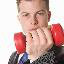

In [64]:
cleanset[0][0]
# Tinyimagenet split into two halves, the class labels are adjusted to start at 0
# I guess the FC layer for transfer learning has 100 output units, not 200. The first 100 classes don't matter
# For the from scratch training, use the whole dataset. 
# When testing transfer learning, must specify tinyimagenet_last. For from scratch tiny imagenet, 
# specify tinyimagenet_all.

In [69]:
def getTrial(n, attack):
    with open(f'poison_examples/tinyimagenet_transfer/{attack}_poisons/{n}/base_indices.pickle','rb') as handle:
        base = pickle.load(handle)
    with open(f'poison_examples/tinyimagenet_transfer/{attack}_poisons/{n}/target.pickle','rb') as handle:
        target = pickle.load(handle)
    with open(f'poison_examples/tinyimagenet_transfer/{attack}_poisons/{n}/poisons.pickle','rb') as handle:
        poisons= pickle.load(handle)
    return base, target, poisons

In [70]:
base, target, poisons = getTrial(0, 'badnets')

In [81]:
poisons

[(<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEF97A0A0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEB564E50>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEB564BE0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEB564FA0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEB564D60>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEB564AC0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEB564AF0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEB564EB0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEEEF4640>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEEEF48B0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEEEF4190>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEEEF4370>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEEEF40D0>, 29),
 (<PIL.Image.Image image mode=RGB size=64x64 at 0x7FCCEEEF4FA0>, 29),
 (<PIL.Image.Image i